In [6]:
!python3 -m pip install pandas
import pandas as pd

df = pd.read_csv("/Users/yashswinkapil/Downloads/Premier League Player Stats.csv", encoding="latin1")

# Check columns
print(df.columns)

# Keep only useful columns (example: TEAM, GP, G, ASST, SHOTS, SOG)
df = df[['TEAM', 'GP', 'G', 'ASST', 'SHOTS', 'SOG']]

# Check first 5 rows
df.head()

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Index(['Rank', 'PLAYER', 'TEAM', 'GP', 'GS', 'MIN', 'G', 'ASST', 'SHOTS',
       'SOG'],
      dtype='object')


,TEAM,GP,G,ASST,SHOTS,SOG
0,Leicester City,35,23,5,71,43
1,Southampton,38,22,2,66,38
2,Arsenal,36,22,3,70,42
3,Manchester City,33,20,1,68,38
4,Liverpool,34,19,10,95,59


In [7]:
# Step 3: Check the columns
print(df.columns)
print(df.head())

Index(['TEAM', 'GP', 'G', 'ASST', 'SHOTS', 'SOG'], dtype='object')
              TEAM  GP   G  ASST  SHOTS  SOG
0   Leicester City  35  23     5     71   43
1      Southampton  38  22     2     66   38
2          Arsenal  36  22     3     70   42
3  Manchester City  33  20     1     68   38
4        Liverpool  34  19    10     95   59


In [9]:
# Step 4: Keep useful columns
df = df[['TEAM', 'GP',  'G', 'ASST', 'SHOTS', 'SOG']]

In [10]:
# Step 5: Fill missing values with 0
df.fillna(0, inplace=True)

In [11]:
# Step 6: Create Player Impact Score
# A custom formula: Goals*4 + Assists*3 + Shots on Goal*1 + GP bonus
df['Impact_Score'] = df['G']*4 + df['ASST']*3 + df['SOG']*1 + (df['GP']*0.5)

In [13]:
# Step 7: Team Efficiency Metrics (without minutes)
team_stats = df.groupby('TEAM').agg({
    'G':'sum',
    'ASST':'sum',
    'SHOTS':'sum',
    'SOG':'sum',
    'Impact_Score':'sum'
}).reset_index()

# Efficiency: Goals per Game
team_stats['Goals_per_Game'] = team_stats['G'] / df.groupby('TEAM')['GP'].sum().values

# Efficiency: Shots per Goal
team_stats['Shots_per_Goal'] = team_stats['SHOTS'] / team_stats['G']
team_stats['Shots_per_Goal'].replace([float('inf'), float('nan')], 0, inplace=True)

print(team_stats)

                        TEAM    G  ASST  SHOTS  SOG  Impact_Score  \
0                    Arsenal   56    36    311  155         761.5   
1                Aston Villa   40    32    335  150         668.0   
2                Bournemouth   37    20    251  110         566.0   
3   Brighton and Hove Albion   32    22    305  133         580.5   
4                    Burnley   39    28    281  128         593.5   
5                    Chelsea   69    46    447  223         904.0   
6             Crystal Palace   27    19    267  116         533.0   
7                    Everton   43    32    337  164         694.5   
8             Leicester City   65    47    398  190         859.0   
9                  Liverpool   83    69    428  232        1043.5   
10           Manchester City  100    69    519  266        1138.5   
11         Manchester United   65    43    413  216         866.5   
12          Newcastle United   36    27    274  127         615.0   
13              Norwich City   24 

/var/folders/1v/0j8c43nn1mnb2nlkk_vvd0sw0000gn/T/ipykernel_17341/572147706.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  team_stats['Shots_per_Goal'].replace([float('inf'), float('nan')], 0, inplace=True)


In [14]:
# Step 8: Top 10 Players by Impact Score
top_players = df.sort_values(by='Impact_Score', ascending=False).head(10)
print("Top 10 Players:")
print(top_players[['TEAM','G','ASST','SOG','Impact_Score']])


Top 10 Players:
                       TEAM   G  ASST  SOG  Impact_Score
4                 Liverpool  19    10   59         182.0
0            Leicester City  23     5   43         167.5
14          Manchester City  13    20   31         160.5
2                   Arsenal  22     3   42         157.0
1               Southampton  22     2   38         151.0
7   Wolverhampton Wanderers  17     6   44         149.0
8         Manchester United  17     7   44         148.5
5                 Liverpool  18     7   36         146.5
9         Manchester United  17     6   40         142.0
12          Manchester City  14     7   48         142.0


In [ ]:
# Step 9: Visualizations

In [27]:
!python3 -m pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.8 MB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 294 kB 5.6 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 7.6 MB/s eta 0:00:01
     |████████████████████████████████| 4.7 MB 7.7 MB/s eta 0:00:01
     |████████████████████████████████| 249 kB 8.2 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 15.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 9.8 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


/var/folders/1v/0j8c43nn1mnb2nlkk_vvd0sw0000gn/T/ipykernel_17341/2465167068.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_players, x='Impact_Score', y='TEAM', palette='viridis')


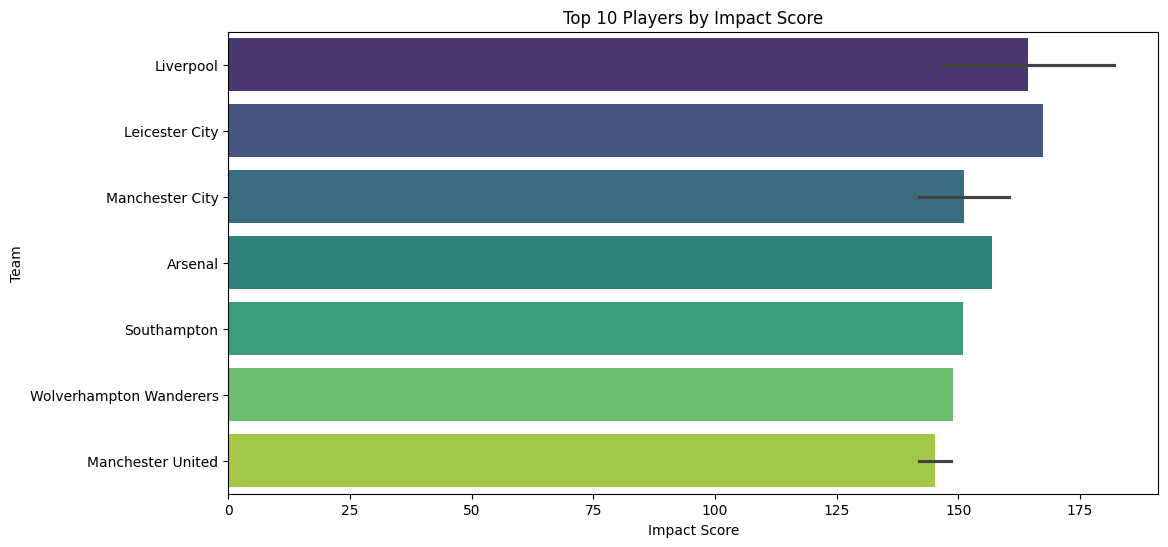

In [32]:
# 9a: Top 10 Players by Impact Score
plt.figure(figsize=(12,6))
sns.barplot(data=top_players, x='Impact_Score', y='TEAM', palette='viridis')
plt.title("Top 10 Players by Impact Score")
plt.xlabel("Impact Score")
plt.ylabel("Team")
plt.show()

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

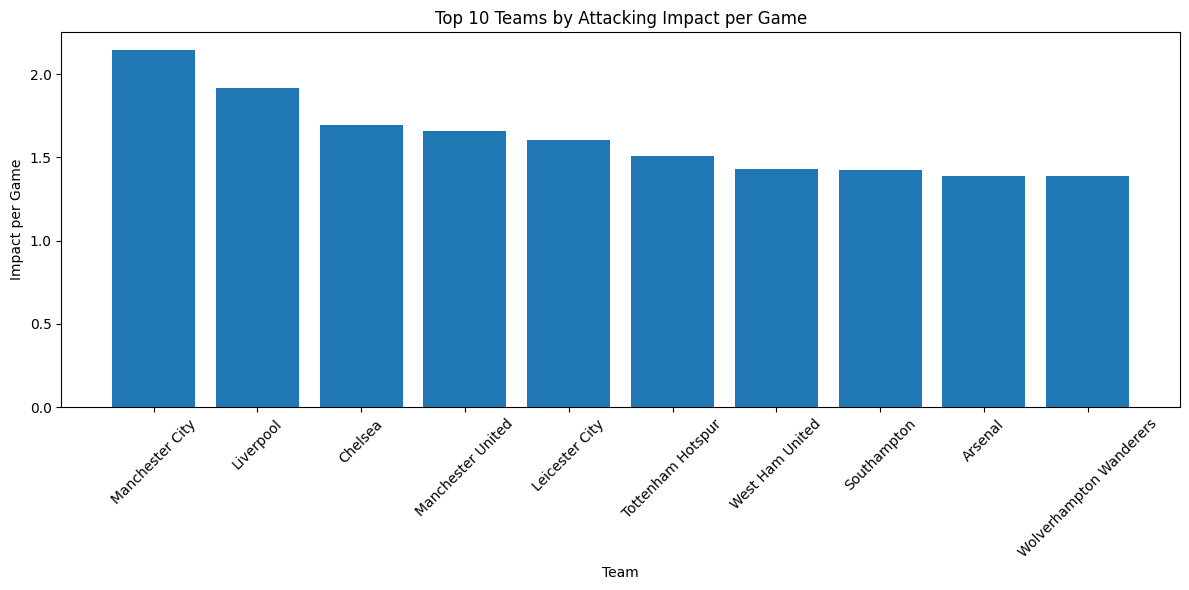

In [39]:
import matplotlib.pyplot as plt

team_efficiency = (
    df.groupby('TEAM')
      .agg({
          'G': 'sum',
          'ASST': 'sum',
          'GP': 'sum',
          'Impact_Score': 'sum'
      })
      .reset_index()
)

team_efficiency['Impact_per_Game'] = (
    team_efficiency['Impact_Score'] / team_efficiency['GP']
)

# Sort for clean visualization
team_efficiency = team_efficiency.sort_values(
    'Impact_per_Game', ascending=False
).head(10)

plt.figure(figsize=(12,6))
plt.bar(team_efficiency['TEAM'], team_efficiency['Impact_per_Game'])
plt.xticks(rotation=45)
plt.title('Top 10 Teams by Attacking Impact per Game')
plt.xlabel('Team')
plt.ylabel('Impact per Game')
plt.tight_layout()
plt.show()

In [41]:
df['Goals_per_Game'] = df['G'] / df['GP']

In [42]:
print(df.columns)

Index(['TEAM', 'GP', 'G', 'ASST', 'SHOTS', 'SOG', 'Impact_Score',
       'Goals_per_Game'],
      dtype='object')


In [44]:
df['Shot_Accuracy'] = df['SOG'] / df['SHOTS']

In [45]:
df['Shot_Accuracy'] = df['Shot_Accuracy'].replace([float('inf'), -float('inf')], None)


In [46]:
df['Goals_per_Game'] = df['G'] / df['GP']

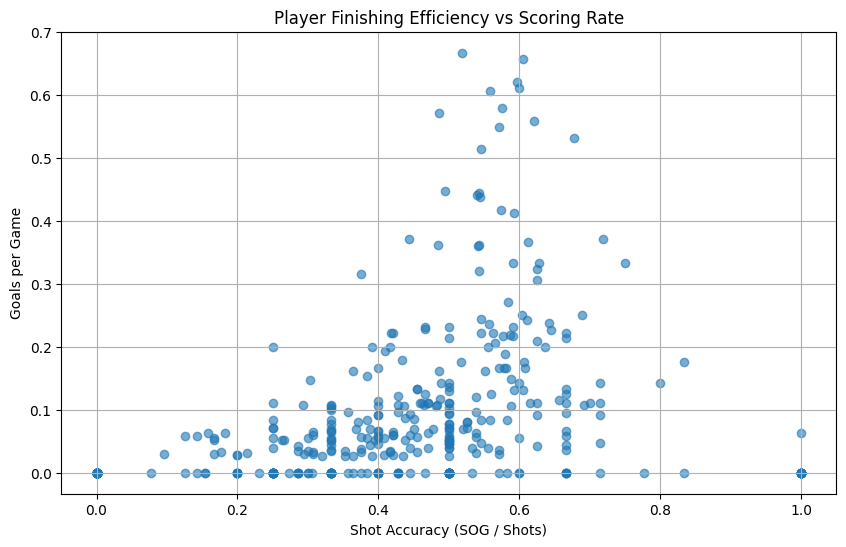

In [47]:
import matplotlib.pyplot as plt

plot_df = df.dropna(subset=['Shot_Accuracy', 'Goals_per_Game'])

plt.figure(figsize=(10,6))
plt.scatter(
    plot_df['Shot_Accuracy'],
    plot_df['Goals_per_Game'],
    alpha=0.6
)

plt.title('Player Finishing Efficiency vs Scoring Rate')
plt.xlabel('Shot Accuracy (SOG / Shots)')
plt.ylabel('Goals per Game')
plt.grid(True)
plt.show()

In [51]:
!python3 -m pip install scikit-learn
from sklearn.cluster import KMeans

features = plot_df[['Goals_per_Game', 'Shot_Accuracy']]
kmeans = KMeans(n_clusters=3, random_state=42)
plot_df['Player_Cluster'] = kmeans.fit_predict(features)

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.1 MB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 30.3 MB 9.3 MB/s eta 0:00:011
     |████████████████████████████████| 309 kB 8.4 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


/var/folders/1v/0j8c43nn1mnb2nlkk_vvd0sw0000gn/T/ipykernel_17341/1548434320.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['Player_Cluster'] = kmeans.fit_predict(features)


In [53]:
from sklearn.linear_model import LinearRegression

X = plot_df[['Shot_Accuracy']]
y = plot_df['Goals_per_Game']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [54]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

In [55]:
model.coef_

array([0.19694174])

In [56]:
model.intercept_

np.float64(0.008611286292636855)

In [57]:
model.score(X, y)

0.12603543691224794